## Waterstanden meten uit timelapse video

Auteur Rob van Putten, rob.van.putten@waternet.nl, breinbaasnl@gmail.com, december 2017

### Probleemstelling

Kunnen we aan de hand van een timelapse video de waterstanden uitlezen. Een voorbeeld van een afbeelding uit de timelapse video is 

![title](img/voorbeeld_img.jpg)

### Werkwijze 

#### Stap 1 - Extraheren van de afbeeldingen uit het videobestand

Om de afbeeldingen uit het video bestand te krijgen gebruiken we het volgende commanda (via de linux command line);

`ffmpeg -i <videobestand> -qscale:v 2 output_%05d.jpg`

Het is van belang om de parameter `qscale` mee te geven om de hoogste kwaliteit van een jpg te krijgen en daarmee geen informatie te verliezen.

#### Stap 2 - Uitlezen getallen uit de individuele afbeeldingen

We moeten de afbeelding roteren en daarna de individuele getallen uitlezen. Hiertoe passen we een transformatie toe en schrijven we per afbeelding alle getallen weg.

Opmerkingen;
* deze werkwijze vereist dat de locatie van de getallen per afbeelding hetzelfde blijft. Met andere woorden, als de camera verschuift werkt dit niet meer!
* we gebruiken quick and dirty code, optimalisatie kan later wel
* de rotatie en de locatie van de getallen na rotatie zijn bepaald met GIMP

In [ ]:
import cv2
import imutils
import glob

In [ ]:
OUT_DIR = 'data/getallen/'

i = 1
for f in glob.glob('data/out*.jpg'):
    img = cv2.imread(f)
    img = imutils.rotate(img, 134)
    r1 = [225, 248, 623, 640] 
    r2 = [225, 248, 644, 663]
    r3 = [224, 247, 667, 686]
    r4 = [224, 247, 692, 709]
    r5 = [223, 246, 714, 732]
    r6 = [225, 246, 739, 754]
    r7 = [224, 247, 762, 778]
    r8 = [224, 247, 787, 802]
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r1[0]:r1[1], r1[2]:r1[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r2[0]:r2[1], r2[2]:r2[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r3[0]:r3[1], r3[2]:r3[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r4[0]:r4[1], r4[2]:r4[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r5[0]:r5[1], r5[2]:r5[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r6[0]:r6[1], r6[2]:r6[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r7[0]:r7[1], r7[2]:r7[3]])
    i += 1
    cv2.imwrite(OUT_DIR + 'getal%05d.jpg' % i, img[r8[0]:r8[1], r8[2]:r8[3]])
    i += 1

#### Stap 3 - Trainen Tensorflow neuraal netwerk met standaard MNIST dataset

Je kunt Tensorflow eenvoudig trainen op de standaard MNIST dataset. Deze behaalt o.b.v. een groot aantal handgeschreven getallen een nauwkeurigheid van ruim 99%. De vraag is echter of die ook werkt op onze dataset.

**NB** De code voor het bouwen van het model is opgenomen in het script build_model.py

We trainen de dataset en schrijven die weg in de models directory (let op, duurt ca 3 minuten op een i7 met GTX1070)

In [1]:
import build_model
build_model.execute()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.01
step 2000, training accuracy 0.99
step 4000, training accuracy 1
step 6000, training accuracy 0.98
step 8000, training accuracy 0.98
step 10000, training accuracy 1
step 12000, training accuracy 1
step 14000, training accuracy 1
step 16000, training accuracy 1
step 18000, training accuracy 1
test accuracy 0.9931
Model saved in file:  models/tfmodel.ckpt


#### Stap 4 - Testen van TF model op onze data

We gaan het nieuwe model testen op onze data. Hiertoe wordt het model geladen en gebruiken we het op een aantal testdata.

**NB** De code voor het laden van het model is opgenomen in het script load_model.py

We lezen 10 random afbeeldingen uit de testdata en kijken wat ons model voorspelt.

In [56]:
import glob
import os
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import load_model

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

%matplotlib inline

In [57]:
all_testfiles = [filename for filename in glob.iglob('data/getallen/test/*/*.jpg', recursive=True)]
random.shuffle(all_testfiles)

INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


/home/breinbaas/programmeren/envs/dlnd/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


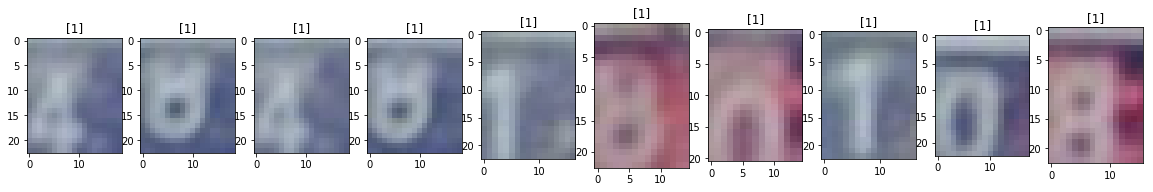

In [59]:
images = []
labels = []
for i in range(0, 10):
    images.append(mpimg.imread(all_testfiles[i]))
    labels.append(load_model.predict(all_testfiles[i]))
    
plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):    
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.title(labels[i])
    plt.imshow(image)

Dat is een slechte score want alles wordt gelabeld als het getal 1. We controleren even of het model echt wel goed is door een paar getallen uit de MNIST database in te voeren.

INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


/home/breinbaas/programmeren/envs/dlnd/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


INFO:tensorflow:Restoring parameters from ./models/tfmodel.ckpt


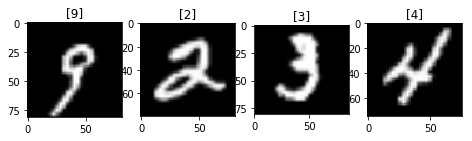

In [64]:
mnist_testfiles = glob.glob('data/mnist/*.png')

images = []
labels = []
for i in range(len(mnist_testfiles)):
    images.append(mpimg.imread(mnist_testfiles[i]))
    labels.append(load_model.predict(mnist_testfiles[i]))
    
plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):    
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.title(labels[i])
    plt.imshow(image)

Het model voorspelt prima op basis van de MNIST data want alle labels kloppen.

Helaas, het MNIST model is niet geschikt voor onze doeleinden. We zullen zelf een diep netwerk moeten bouwen.

**NB** We hadden ook kunnen kijken of we de afbeeldingen via opencv niet met wat filters kunnen bewerken door bv thresholds in te stellen maar na wat uitproberen bleek dit niet de gewenste nauwkeurigheid te halen.

#### Stap 5 - Eigen diep neuraal netwerk bouwen en trainen 

In [65]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [68]:
batch = mnist.train.next_batch(100)

In [71]:
batch[0].shape

(100, 784)